In [14]:
import os
import json

def simple_pred_counter(folder_path):
    grand_total_before = 0
    grand_total_after = 0

    print("Per-file counts:\n")

    for file in sorted(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file)
        if file.endswith('.json') and os.path.isfile(file_path):
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)

                    file_before = 0
                    file_after = 0

                    for entry in data:
                        file_before += len(entry.get("before_preds", []))
                        file_after += len(entry.get("after_preds", []))

                    print(f"{file}: before_preds = {file_before}, after_preds = {file_after}")

                    grand_total_before += file_before
                    grand_total_after += file_after
            except Exception as e:
                print(f"Failed to read {file_path}: {e}")

    print("\nGrand Totals:")
    print(f"Total 'before_preds': {grand_total_before}")
    print(f"Total 'after_preds' : {grand_total_after}")

# Example usage
simple_pred_counter("output/sok/kept")


Per-file counts:

0x39b1df026010b5aea781f90542ee19e900f2db15-kept.json: before_preds = 27, after_preds = 27
0x3ec4a6cfe803ee84009ce6e1ecf419c9cb1e8af0-kept.json: before_preds = 567, after_preds = 567
0x6684977bbed67e101bb80fc07fccfba655c0a64f-kept.json: before_preds = 39, after_preds = 39
0x67b66c99d3eb37fa76aa3ed1ff33e8e39f0b9c7a-kept.json: before_preds = 278, after_preds = 278
0x6847259b2b3a4c17e7c43c54409810af48ba5210-kept.json: before_preds = 232, after_preds = 232
0x6b7a87899490ece95443e979ca9485cbe7e71522-kept.json: before_preds = 56, after_preds = 56
0x818e6fecd516ecc3849daf6845e3ec868087b755-kept.json: before_preds = 123, after_preds = 123
0x88093840aad42d2621e1a452bf5d7076ff804d61-kept.json: before_preds = 171, after_preds = 171
0xacd43e627e64355f1861cec6d3a6688b31a6f952-kept.json: before_preds = 186, after_preds = 186
0xe11fc0b43ab98eb91e9836129d1ee7c3bc95df50-kept.json: before_preds = 56, after_preds = 56

Grand Totals:
Total 'before_preds': 1735
Total 'after_preds' : 1735


## Detecting if the clusters that did not remove anything from, were indeed single-invariant clusters

In [20]:
import os
import json

def count_non_uniform_and_non_singletons(folder_path):
    total_flagged_entries = 0
    total_files = 0

    print("📄 File-wise flagged entries (non-uniform or non-singleton):\n")

    for file in sorted(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file)
        if file.endswith('.json') and os.path.isfile(file_path):
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)

                    if not isinstance(data, list):
                        continue

                    flagged_count = 0

                    for entry in data:
                        before = entry.get("before_preds", [])
                        after = entry.get("after_preds", [])

                        # Count it if:
                        # 1. lengths are not both 1
                        # OR
                        # 2. lengths are both 1 but contents differ
                        if len(before) != 1 or len(after) != 1 or before[0] != after[0]:
                            flagged_count += 1

                    if flagged_count > 0:
                        print(f"{file}: {flagged_count} flagged entries")
                        total_flagged_entries += flagged_count
                        total_files += 1

            except Exception as e:
                print(f"{file}: Failed to read ({e})")

    print("\n📊 Summary:")
    print(f"Total files with flagged entries: {total_files}")
    print(f"Total flagged entries (non-uniform or non-singleton): {total_flagged_entries}")

# Example usage
count_non_uniform_and_non_singletons("output/erc20/kept")


📄 File-wise flagged entries (non-uniform or non-singleton):

0x8b68591fe802585a9713bd6ebe75d6c285236c54-kept.json: 1 flagged entries
0xbc7d4fb8595f4b923ec53533f4bbd641c1910aca-kept.json: 2 flagged entries
0xc382e04099a435439725bb40647e2b32dc136806-kept.json: 1 flagged entries
0xf61ae54b74a37be4fc11e9f1a35021848d996afc-kept.json: 2 flagged entries

📊 Summary:
Total files with flagged entries: 4
Total flagged entries (non-uniform or non-singleton): 6


In [21]:
count_non_uniform_and_non_singletons("output/sok/kept")

📄 File-wise flagged entries (non-uniform or non-singleton):

0x3ec4a6cfe803ee84009ce6e1ecf419c9cb1e8af0-kept.json: 1 flagged entries

📊 Summary:
Total files with flagged entries: 1
Total flagged entries (non-uniform or non-singleton): 1


## Let's count the number of clusters: 

In [25]:
import os
import json

def count_json_entries(folder_path):
    total_entries = 0

    print("📄 Entry counts per file:\n")

    for file in sorted(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file)
        if file.endswith('.json') and os.path.isfile(file_path):
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)

                    if isinstance(data, list):
                        count = len(data)
                        print(f"{file}: {count} entries")
                        total_entries += count
                    else:
                        print(f"{file}: skipped (not a list)")
            except Exception as e:
                print(f"{file}: failed to read ({e})")

    print(f"\n📊 Total entries across all files: {total_entries}")

# Example usage
count_json_entries("output/sok/kept")


📄 Entry counts per file:

0x39b1df026010b5aea781f90542ee19e900f2db15-kept.json: 27 entries
0x3ec4a6cfe803ee84009ce6e1ecf419c9cb1e8af0-kept.json: 565 entries
0x6684977bbed67e101bb80fc07fccfba655c0a64f-kept.json: 39 entries
0x67b66c99d3eb37fa76aa3ed1ff33e8e39f0b9c7a-kept.json: 278 entries
0x6847259b2b3a4c17e7c43c54409810af48ba5210-kept.json: 232 entries
0x6b7a87899490ece95443e979ca9485cbe7e71522-kept.json: 56 entries
0x818e6fecd516ecc3849daf6845e3ec868087b755-kept.json: 123 entries
0x88093840aad42d2621e1a452bf5d7076ff804d61-kept.json: 171 entries
0xacd43e627e64355f1861cec6d3a6688b31a6f952-kept.json: 186 entries
0xe11fc0b43ab98eb91e9836129d1ee7c3bc95df50-kept.json: 56 entries

📊 Total entries across all files: 1733


## Per-contract analysis

In [1]:
import os
import json

def count_preds(file_path):
    before_count = 0
    after_count = 0
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            for entry in data:
                before_count += len(entry.get("before_preds", []))
                after_count += len(entry.get("after_preds", []))
    except Exception as e:
        print(f"Failed to process {file_path}: {e}")
    return before_count, after_count

def compute_reduction_ratios(kept_folder, removed_folder):
    reduction_ratios = {}

    kept_files = [f for f in os.listdir(kept_folder) if f.endswith("-kept.json")]

    for kept_file in kept_files:
        contract_address = kept_file.replace("-kept.json", "")
        removed_file = f"{contract_address}-removed.json"

        kept_path = os.path.join(kept_folder, kept_file)
        removed_path = os.path.join(removed_folder, removed_file)

        if not os.path.exists(removed_path):
            print(f"Missing removed file for contract {contract_address}")
            reduction_ratios[contract_address] = 0
            continue

        # Count before/after preds
        kept_before, _ = count_preds(kept_path)
        removed_before, removed_after = count_preds(removed_path)

        denominator = kept_before + removed_before
        if denominator == 0:
            print(f"Zero total 'before_preds' for contract {contract_address}, skipping.")
            continue

        reduction = (removed_before - removed_after) / denominator
        reduction_ratios[contract_address] = reduction

    return reduction_ratios

kept_dir = "output/erc20/kept"
removed_dir = "output/erc20/removed"

ratios_erc20 = compute_reduction_ratios(kept_dir, removed_dir)
print("\n📉 Reduction Ratios:")
for contract, ratio in ratios_erc20.items():
    print(f"{contract}: {ratio:.4f}")



📉 Reduction Ratios:
0xc382e04099a435439725bb40647e2b32dc136806: 0.4365
0xce90d1d98b5ca16b79c7eedada2454c2564da59e: 0.4560
0xbc7d4fb8595f4b923ec53533f4bbd641c1910aca: 0.4187
0x28e57c27368d1475a3ce49a25c48c40b85e7f7e1: 0.4514
0xb2923909b5d8bbe01505121f15a4503b6617dae7: 0.3964
0x8b68591fe802585a9713bd6ebe75d6c285236c54: 0.4362
0xcc494c97a5d4374ec35bda83570c461c6d6f6079: 0.4146
0x6f2a550259532f7429530dcb93d86269629e3f2a: 0.4172
0x923f3fe77732ec3fc5327eb52327b06be4e472f8: 0.3586
0x3b2833cd4cfce20c04d0279ccbb8cd827c8bcdbf: 0.3704
0x9fdbdd708b6f7247d57e9281e2073d2b88a67a42: 0.4051
0x1600c2e08acb830f2a4ee4d34b48594dade48651: 0.3368
0xeeb690a0c9958e5375eda5694e754b125a6c972c: 0.4360
0x4d5d3170f407cacaaa328660c2ee2499055e3b07: 0.4255
0xf61ae54b74a37be4fc11e9f1a35021848d996afc: 0.4417
0x37a15c92e67686aa268df03d4c881a76340907e8: 0.3924
0x1fee5588cb1de19c70b6ad5399152d8c643fae7b: 0.4103
0xd4ac90e33ac839c29a3d98c807eeef0c4508bee8: 0.4188


In [2]:
kept_dir = "output/sok/kept"
removed_dir = "output/sok/removed"

ratios_sok = compute_reduction_ratios(kept_dir, removed_dir)
print("\n📉 Reduction Ratios:")
for contract, ratio in ratios_sok.items():
    print(f"{contract}: {ratio:.4f}")


Missing removed file for contract 0xe11fc0b43ab98eb91e9836129d1ee7c3bc95df50
Missing removed file for contract 0x6684977bbed67e101bb80fc07fccfba655c0a64f

📉 Reduction Ratios:
0xacd43e627e64355f1861cec6d3a6688b31a6f952: 0.3739
0x6847259b2b3a4c17e7c43c54409810af48ba5210: 0.1697
0xe11fc0b43ab98eb91e9836129d1ee7c3bc95df50: 0.0000
0x88093840aad42d2621e1a452bf5d7076ff804d61: 0.2642
0x39b1df026010b5aea781f90542ee19e900f2db15: 0.2667
0x67b66c99d3eb37fa76aa3ed1ff33e8e39f0b9c7a: 0.3927
0x6b7a87899490ece95443e979ca9485cbe7e71522: 0.2045
0x3ec4a6cfe803ee84009ce6e1ecf419c9cb1e8af0: 0.3803
0x6684977bbed67e101bb80fc07fccfba655c0a64f: 0.0000
0x818e6fecd516ecc3849daf6845e3ec868087b755: 0.0780


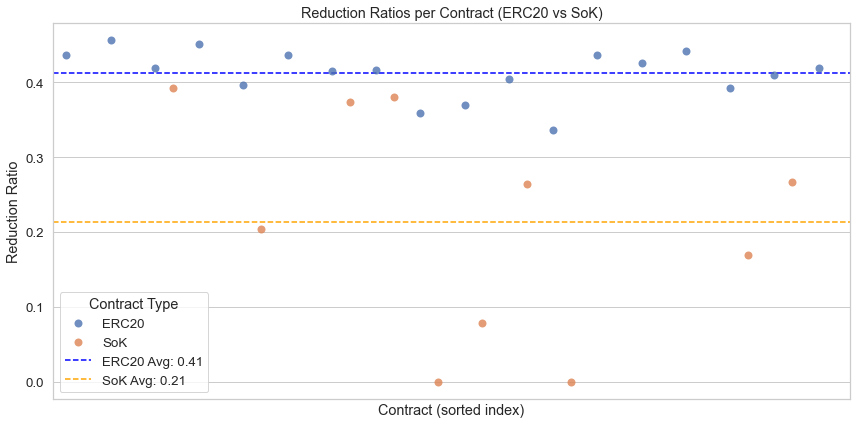

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine data
data = []
for contract, ratio in ratios_erc20.items():
    data.append({"contract": contract, "ratio": ratio, "group": "ERC20"})
for contract, ratio in ratios_sok.items():
    data.append({"contract": contract, "ratio": ratio, "group": "SoK"})

# Create DataFrame
df = pd.DataFrame(data)

# Sort within groups for better display
df['contract'] = df.groupby('group')['ratio'].transform(
    lambda x: x.rank(method="first")).astype(int).astype(str)

# Set plot style
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))

# Plot stripplot
sns.stripplot(data=df, x="contract", y="ratio", hue="group", dodge=True, jitter=0.25, size=8, alpha=0.8)

# Optionally overlay average lines
erc20_avg = df[df["group"] == "ERC20"]["ratio"].mean()
sok_avg = df[df["group"] == "SoK"]["ratio"].mean()
plt.axhline(erc20_avg, color="blue", linestyle="--", label=f"ERC20 Avg: {erc20_avg:.2f}")
plt.axhline(sok_avg, color="orange", linestyle="--", label=f"SoK Avg: {sok_avg:.2f}")

# Labels and legend
plt.title("Reduction Ratios per Contract (ERC20 vs SoK)")
plt.xlabel("Contract (sorted index)")
plt.ylabel("Reduction Ratio")
plt.legend(title="Contract Type")
plt.xticks([], [])  # Hide x-axis ticks since contract names are not human-friendly

plt.tight_layout()
plt.show()


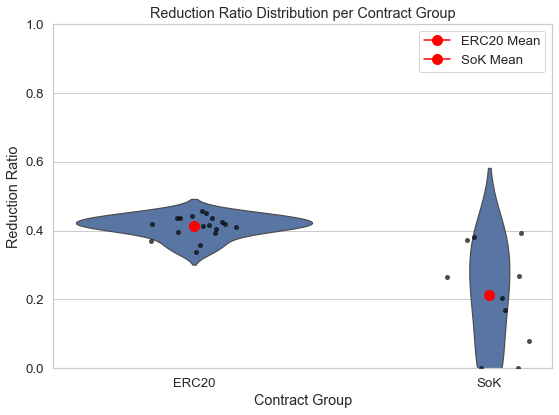

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample: ratios_erc20 and ratios_sok should be defined before this
# Example:
# ratios_erc20 = {'0x123...': 0.42, ...}
# ratios_sok = {'0xabc...': 0.25, ...}

# Prepare combined DataFrame
data = []
for contract, ratio in ratios_erc20.items():
    data.append({"contract": contract, "ratio": ratio, "group": "ERC20"})
for contract, ratio in ratios_sok.items():
    data.append({"contract": contract, "ratio": ratio, "group": "SoK"})

df = pd.DataFrame(data)

# Plotting
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(8, 6))

# Violin plot
sns.violinplot(x="group", y="ratio", data=df, inner=None, linewidth=1.2)

# Overlay individual points
sns.stripplot(x="group", y="ratio", data=df, color="black", size=5, jitter=0.15, alpha=0.7)

# Overlay red dot for mean of each group, with proper labels
group_means = df.groupby("group")["ratio"].mean()
for i, group in enumerate(["ERC20", "SoK"]):
    plt.plot(i, group_means[group], marker='o', color='red', markersize=10, label=f'{group} Mean')

# Deduplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')

# Final styling
plt.title("Reduction Ratio Distribution per Contract Group")
plt.xlabel("Contract Group")
plt.ylabel("Reduction Ratio")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


<ipython-input-10-6e17e248713c>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-10-6e17e248713c>:25: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
<ipython-input-10-6e17e248713c>:25: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.3`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(


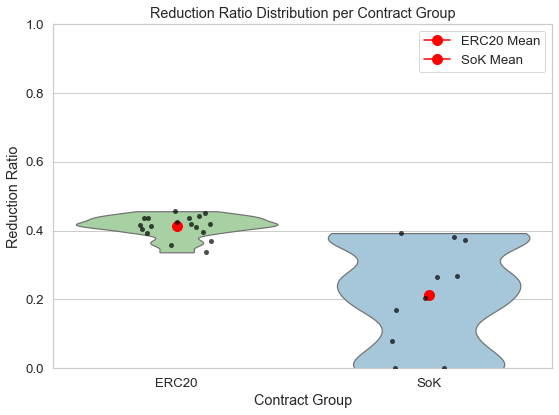

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine data
data = []
for contract, ratio in ratios_erc20.items():
    data.append({"contract": contract, "ratio": ratio, "group": "ERC20"})
for contract, ratio in ratios_sok.items():
    data.append({"contract": contract, "ratio": ratio, "group": "SoK"})

df = pd.DataFrame(data)

# Custom professional color palette
palette = {
    "ERC20": "#a1d99b",  # soft green
    "SoK": "#9ecae1"     # soft blue
}

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(8, 6))

# Violin plot with better KDE control
sns.violinplot(
    x="group", y="ratio", data=df,
    inner=None, linewidth=1.2,
    palette=palette,
    cut=0, bw=0.3, scale="width"
)

# Overlay individual points
sns.stripplot(x="group", y="ratio", data=df, color="black", size=5, jitter=0.15, alpha=0.7)

# Overlay red mean dot
group_means = df.groupby("group")["ratio"].mean()
for i, group in enumerate(["ERC20", "SoK"]):
    plt.plot(i, group_means[group], marker='o', color='red', markersize=10, label=f'{group} Mean')

# Deduplicate legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')

# Labels and layout
plt.title("Reduction Ratio Distribution per Contract Group")
plt.xlabel("Contract Group")
plt.ylabel("Reduction Ratio")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


<ipython-input-14-7a394c754c11>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


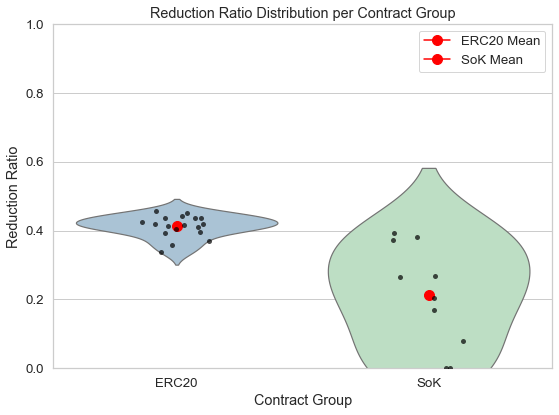

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine data
data = []
for contract, ratio in ratios_erc20.items():
    data.append({"contract": contract, "ratio": ratio, "group": "ERC20"})
for contract, ratio in ratios_sok.items():
    data.append({"contract": contract, "ratio": ratio, "group": "SoK"})

df = pd.DataFrame(data)

# Color palette: soft green and soft blue
custom_palette = {
    "ERC20": "#a3c4dc",  # soft blue
    "SoK": "#b7e3c1"     # soft green
}

sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(8, 6))

# Violin plot with professional color and 'count' scale (height matches # of points)
sns.violinplot(
    x="group",
    y="ratio",
    data=df,
    inner=None,
    linewidth=1.2,
    palette=custom_palette,
    density_norm="count"  # this helps avoid misleading sharp peaks
)

# Overlay black dots for individual entries
sns.stripplot(
    x="group",
    y="ratio",
    data=df,
    color="black",
    size=5,
    jitter=0.15,
    alpha=0.7
)

# Overlay red dots for group means
group_means = df.groupby("group")["ratio"].mean()
for i, group in enumerate(["ERC20", "SoK"]):
    plt.plot(i, group_means[group], marker='o', color='red', markersize=10, label=f'{group} Mean')

# Deduplicate legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')

# Final plot aesthetics
plt.title("Reduction Ratio Distribution per Contract Group")
plt.xlabel("Contract Group")
plt.ylabel("Reduction Ratio")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


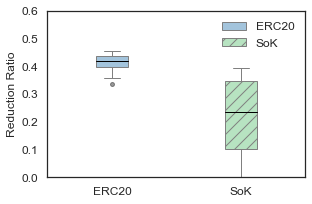

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch

# Prepare data
data = []
for contract, ratio in ratios_erc20.items():
    data.append({"contract": contract, "ratio": ratio, "group": "ERC20"})
for contract, ratio in ratios_sok.items():
    data.append({"contract": contract, "ratio": ratio, "group": "SoK"})

df = pd.DataFrame(data)

# Colors and hatch
colors = {"ERC20": "#a3c4dc", "SoK": "#b7e3c1"}
hatch_map = {"ERC20": "", "SoK": "//"}

# Set font size globally to 12
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
})

# Create figure
fig, ax = plt.subplots(figsize=(4.5, 3))  # Adapted for double-column width with a bit more room

# Plot boxplots manually
box_width = 0.25
for i, group in enumerate(["ERC20", "SoK"]):
    subset = df[df["group"] == group]["ratio"]
    box = ax.boxplot(
        subset,
        positions=[i],
        widths=box_width,
        patch_artist=True,
        boxprops=dict(facecolor=colors[group], hatch=hatch_map[group], edgecolor='gray'),
        medianprops=dict(color='black'),
        whiskerprops=dict(color='gray'),
        capprops=dict(color='gray'),
        flierprops=dict(marker='o', markersize=4, markerfacecolor='black', alpha=0.4)
    )

# Axes settings
ax.set_xticks([0, 1])
ax.set_xticklabels(["ERC20", "SoK"])
ax.set_ylabel("Reduction Ratio")
ax.set_ylim(0, 0.6)
ax.grid(False)

# Legend
legend_elements = [
    Patch(facecolor=colors["ERC20"], edgecolor='gray', label='ERC20'),
    Patch(facecolor=colors["SoK"], edgecolor='gray', hatch='//', label='SoK')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=False)

# Layout
plt.tight_layout()

plt.savefig("reduction_ratio_boxplot.pdf", dpi=300, bbox_inches='tight')

plt.show()


## Counting the reduction ratio per-dataset

In [25]:
import os
import json

def count_preds(file_path):
    before_count = 0
    after_count = 0
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            for entry in data:
                before_count += len(entry.get("before_preds", []))
                after_count += len(entry.get("after_preds", []))
    except Exception as e:
        print(f"Failed to process {file_path}: {e}")
    return before_count, after_count

def compute_dataset_reduction_ratio(kept_folder, removed_folder):
    total_kept_before = 0
    total_removed_before = 0
    total_removed_after = 0

    kept_files = [f for f in os.listdir(kept_folder) if f.endswith("-kept.json")]

    for kept_file in kept_files:
        contract_address = kept_file.replace("-kept.json", "")
        removed_file = f"{contract_address}-removed.json"

        kept_path = os.path.join(kept_folder, kept_file)
        removed_path = os.path.join(removed_folder, removed_file)

        if not os.path.exists(removed_path):
            print(f"Missing removed file for contract {contract_address}")
            continue

        kept_before, _ = count_preds(kept_path)
        removed_before, removed_after = count_preds(removed_path)

        total_kept_before += kept_before
        total_removed_before += removed_before
        total_removed_after += removed_after

    denominator = total_kept_before + total_removed_before
    if denominator == 0:
        print("Zero total 'before_preds' across dataset — cannot compute reduction.")
        return None

    reduction_ratio = (total_removed_before - total_removed_after) / denominator
    return reduction_ratio

# Run for ERC20
erc20_kept = "output/erc20/kept"
erc20_removed = "output/erc20/removed"
erc20_total_reduction = compute_dataset_reduction_ratio(erc20_kept, erc20_removed)

# Run for SoK
sok_kept = "output/sok/kept"
sok_removed = "output/sok/removed"
sok_total_reduction = compute_dataset_reduction_ratio(sok_kept, sok_removed)

# Print result
print("\n📊 Total Reduction Ratios:")
print(f"ERC20 Dataset: {erc20_total_reduction:.4f}")
print(f"SoK Dataset  : {sok_total_reduction:.4f}")


Missing removed file for contract 0xe11fc0b43ab98eb91e9836129d1ee7c3bc95df50
Missing removed file for contract 0x6684977bbed67e101bb80fc07fccfba655c0a64f

📊 Total Reduction Ratios:
ERC20 Dataset: 0.4181
SoK Dataset  : 0.3350


## Statistics per contract

In [26]:
import os
import json

def count_preds(file_path):
    before_count = 0
    after_count = 0
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            for entry in data:
                before_count += len(entry.get("before_preds", []))
                after_count += len(entry.get("after_preds", []))
    except Exception as e:
        print(f"Failed to process {file_path}: {e}")
    return before_count, after_count

def average_predicates_removed_per_contract(removed_folder):
    removed_files = [f for f in os.listdir(removed_folder) if f.endswith("-removed.json")]
    
    total_removed = 0
    contract_count = 0

    for removed_file in removed_files:
        file_path = os.path.join(removed_folder, removed_file)
        before, after = count_preds(file_path)
        removed = before - after
        total_removed += removed
        contract_count += 1

    if contract_count == 0:
        print("No contracts found.")
        return None

    average_removed = total_removed / contract_count
    return average_removed

# Example usage
erc20_removed_dir = "output/erc20/removed"
sok_removed_dir = "output/sok/removed"

erc20_avg = average_predicates_removed_per_contract(erc20_removed_dir)
sok_avg = average_predicates_removed_per_contract(sok_removed_dir)

print("\n📊 Average Predicates Removed per Contract:")
print(f"ERC20: {erc20_avg:.2f}")
print(f"SoK  : {sok_avg:.2f}")



📊 Average Predicates Removed per Contract:
ERC20: 71.72
SoK  : 149.50


## Count clusters per datset:

In [28]:
import os
import json

def count_clusters(folder_path, count_after=False):
    total_clusters = 0
    files = [f for f in os.listdir(folder_path) if f.endswith(".json")]

    for file in files:
        file_path = os.path.join(folder_path, file)
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
                if isinstance(data, list):
                    if count_after:
                        total_clusters += sum(1 for entry in data if len(entry.get("after_preds", [])) > 0)
                    else:
                        total_clusters += len(data)
        except Exception as e:
            print(f"Failed to process {file_path}: {e}")
    
    return total_clusters

# Paths
erc20_kept_dir = "output/erc20/kept"
erc20_removed_dir = "output/erc20/removed"
sok_kept_dir = "output/sok/kept"
sok_removed_dir = "output/sok/removed"

# Count before: all clusters
erc20_before = count_clusters(erc20_kept_dir) + count_clusters(erc20_removed_dir)
sok_before = count_clusters(sok_kept_dir) + count_clusters(sok_removed_dir)

# Count after: only clusters with non-empty after_preds
erc20_after = count_clusters(erc20_kept_dir, count_after=True) + count_clusters(erc20_removed_dir, count_after=True)
sok_after = count_clusters(sok_kept_dir, count_after=True) + count_clusters(sok_removed_dir, count_after=True)

# Print
print("\n📦 Total Clusters (Non-Empty after_preds considered):")
print(f"ERC20 - Before Reduction: {erc20_before}")
print(f"ERC20 - After  Reduction: {erc20_after}")
print(f"SoK   - Before Reduction: {sok_before}")
print(f"SoK   - After  Reduction: {sok_after}")



📦 Total Clusters (Non-Empty after_preds considered):
ERC20 - Before Reduction: 1785
ERC20 - After  Reduction: 1785
SoK   - Before Reduction: 2467
SoK   - After  Reduction: 2467


## Predicate counts before and after reduction per dataset

In [29]:
import os
import json

def count_preds(file_path):
    before_count = 0
    after_count = 0
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            for entry in data:
                before_count += len(entry.get("before_preds", []))
                after_count += len(entry.get("after_preds", []))
    except Exception as e:
        print(f"Failed to process {file_path}: {e}")
    return before_count, after_count

def compute_dataset_reduction_stats(kept_folder, removed_folder):
    total_kept_before = 0
    total_removed_before = 0
    total_removed_after = 0

    kept_files = [f for f in os.listdir(kept_folder) if f.endswith("-kept.json")]

    for kept_file in kept_files:
        contract_address = kept_file.replace("-kept.json", "")
        removed_file = f"{contract_address}-removed.json"

        kept_path = os.path.join(kept_folder, kept_file)
        removed_path = os.path.join(removed_folder, removed_file)

        if not os.path.exists(removed_path):
            print(f"Missing removed file for contract {contract_address}")
            continue

        kept_before, _ = count_preds(kept_path)
        removed_before, removed_after = count_preds(removed_path)

        total_kept_before += kept_before
        total_removed_before += removed_before
        total_removed_after += removed_after

    denominator = total_kept_before + total_removed_before
    if denominator == 0:
        print("Zero total 'before_preds' across dataset — cannot compute reduction.")
        return None

    reduction_ratio = (total_removed_before - total_removed_after) / denominator

    return {
        "kept_before": total_kept_before,
        "removed_before": total_removed_before,
        "removed_after": total_removed_after,
        "total_before": denominator,
        "total_after": total_kept_before + total_removed_after,
        "reduction_ratio": reduction_ratio
    }

# Run for ERC20
erc20_stats = compute_dataset_reduction_stats("output/erc20/kept", "output/erc20/removed")

# Run for SoK
sok_stats = compute_dataset_reduction_stats("output/sok/kept", "output/sok/removed")

# Print results
print("\n📊 Predicate Reduction Stats:")
for name, stats in [("ERC20", erc20_stats), ("SoK", sok_stats)]:
    print(f"\n{name} Dataset:")
    print(f"  Kept (before):        {stats['kept_before']}")
    print(f"  Removed (before):     {stats['removed_before']}")
    print(f"  Removed (after):      {stats['removed_after']}")
    print(f"  Total Before:         {stats['total_before']}")
    print(f"  Total After:          {stats['total_after']}")
    print(f"  Reduction Ratio:      {stats['reduction_ratio']:.4f}")


Missing removed file for contract 0xe11fc0b43ab98eb91e9836129d1ee7c3bc95df50
Missing removed file for contract 0x6684977bbed67e101bb80fc07fccfba655c0a64f

📊 Predicate Reduction Stats:

ERC20 Dataset:
  Kept (before):        997
  Removed (before):     2091
  Removed (after):      800
  Total Before:         3088
  Total After:          1797
  Reduction Ratio:      0.4181

SoK Dataset:
  Kept (before):        1640
  Removed (before):     1930
  Removed (after):      734
  Total Before:         3570
  Total After:          2374
  Reduction Ratio:      0.3350
